In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
import sklearn.metrics as m
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from joblib import dump
import pickle

In [2]:
df= pd.read_csv('brain_stroke.csv')

In [3]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4976,False,False,False,False,False,False,False,False,False,False,False
4977,False,False,False,False,False,False,False,False,False,False,False
4978,False,False,False,False,False,False,False,False,False,False,False
4979,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.shape

(4981, 11)

In [7]:
df['bmi'].value_counts()

28.7    42
28.4    41
27.3    38
27.7    37
26.7    37
        ..
48.4     1
48.2     1
46.6     1
40.6     1
14.9     1
Name: bmi, Length: 342, dtype: int64

<AxesSubplot:>

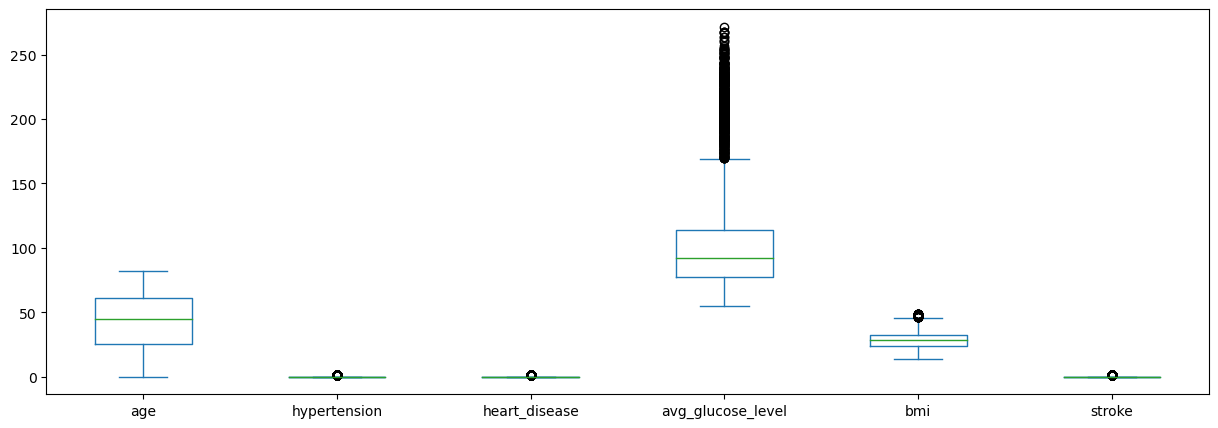

In [8]:
df.plot(kind='box', figsize=(15,5))

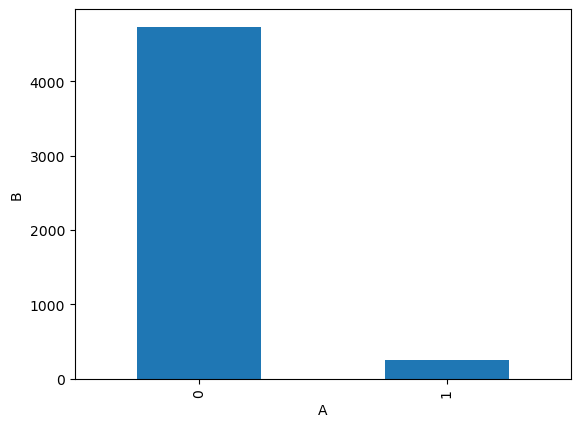

In [9]:
df.stroke.value_counts().plot(kind='bar')
plt.xlabel("A")
plt.ylabel("B")
plt.show()

Part 1

1. implement the imblearn library
2. make a over sampled data set
3. make a under sampled data set
3. save both files as csv

Part 2
1. Use Logistic Regression to classify the dataset of under sampled and oversampled data.
2. create a classfication report

Part 3
1. Use Decision Tree to classify the datasets
2. Create a classification report

In [10]:
x = df.drop(columns='stroke',)
y = df['stroke']

In [11]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [12]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_oresampled, y_oresampled = ros.fit_resample(x,y)
x_oresampled.shape,y_oresampled.shape


((9466, 10), (9466,))

In [13]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_uresampled, y_uresampled = rus.fit_resample(x,y)
x_uresampled.shape, y_uresampled.shape

((496, 10), (496,))

In [14]:
cdf = pd.concat([x_oresampled,y_oresampled], axis=1)
cdf['stroke'].value_counts()

1    4733
0    4733
Name: stroke, dtype: int64

In [15]:
cdf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9461,Male,54.0,0,0,Yes,Private,Rural,96.97,29.1,smokes,1
9462,Male,82.0,0,1,Yes,Private,Urban,144.90,26.4,smokes,1
9463,Male,57.0,1,0,Yes,Govt_job,Urban,78.92,27.7,formerly smoked,1
9464,Male,57.0,1,0,Yes,Private,Urban,212.08,44.2,smokes,1


In [16]:
cat_cols = ['gender','ever_married','work_type','Residence_type','smoking_status']
num_cols = ['age','hypertension','heart_disease','avg_glucose_level','bmi']
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('hot_encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_transformer, num_cols),
    ('categorical', cat_transformer, cat_cols),
])

model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('selector', SelectKBest),
    
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('selector',
                 <class 'sklearn.feature_selection._univariate_selection.SelectKBest'>)])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_oresampled,y_oresampled , test_size=0.2, random_state=1)

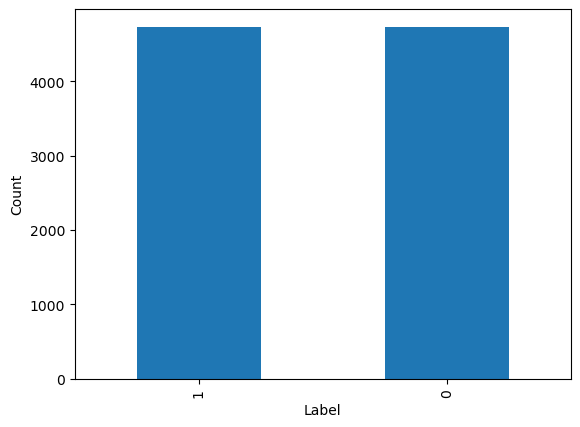

In [18]:
cdf.stroke.value_counts().plot(kind='bar')
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [19]:
print('X_train : ')
print(X_train.head())
print('')
print('X_test : ')
print(X_test.head())
print('')
print('y_train : ')
print(y_train.head())
print('')
print('y_test : ')
print(y_test.head())

X_train : 
      gender   age  hypertension  heart_disease ever_married      work_type  \
4479    Male  62.0             0              0          Yes  Self-employed   
7197    Male  81.0             0              0          Yes        Private   
6203  Female  54.0             0              0          Yes  Self-employed   
8860  Female  77.0             1              0          Yes  Self-employed   
6990  Female  72.0             0              0          Yes        Private   

     Residence_type  avg_glucose_level   bmi smoking_status  
4479          Rural             136.18  32.2        Unknown  
7197          Urban              72.81  26.3   never smoked  
6203          Rural             191.82  40.4         smokes  
8860          Urban             124.13  31.4   never smoked  
6990          Urban             219.91  32.1        Unknown  

X_test : 
      gender   age  hypertension  heart_disease ever_married      work_type  \
4437  Female  28.0             0              0     

In [20]:
lr=LogisticRegression()

In [21]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ('model', LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('model', LogisticRegression())])

In [22]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_oresampled, y_oresampled, test_size=0.2, random_state=1)

pipeline.fit(Xtrain, ytrain)

ypred = pipeline.predict(Xtest)

cm = m.confusion_matrix(ytest, ypred)

report = m.classification_report(ytest, ypred)

<AxesSubplot:>

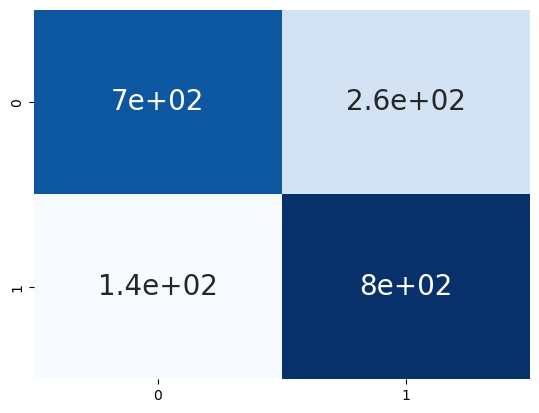

In [23]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 20})

In [24]:
from sklearn.metrics import accuracy_score
ac_lr=accuracy_score(ytest, ypred)

In [25]:
ac_lr

0.7925026399155227

In [26]:
print (report)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78       958
           1       0.76      0.86      0.80       936

    accuracy                           0.79      1894
   macro avg       0.80      0.79      0.79      1894
weighted avg       0.80      0.79      0.79      1894



In [27]:
sv=SVC()

In [28]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ('model', svm.SVC())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('model', SVC())])

In [29]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_oresampled, y_oresampled, test_size=0.2, random_state=1)

pipeline.fit(Xtrain, ytrain)

ypred = pipeline.predict(Xtest)

cm = m.confusion_matrix(ytest, ypred)

report = m.classification_report(ytest, ypred)

<AxesSubplot:>

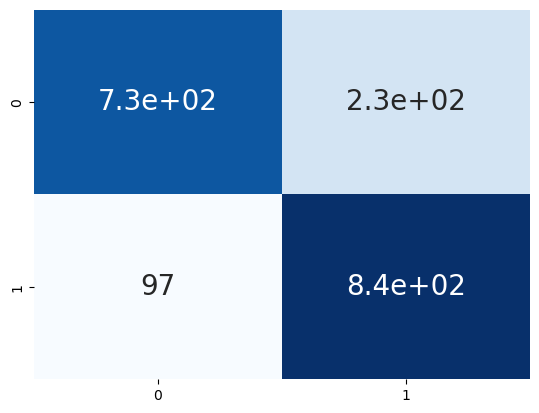

In [30]:
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 20})

In [31]:
ac_svc=accuracy_score(ytest, ypred)

In [32]:
ac_svc

0.8262935586061246

In [33]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.76      0.82       958
           1       0.78      0.90      0.84       936

    accuracy                           0.83      1894
   macro avg       0.83      0.83      0.83      1894
weighted avg       0.83      0.83      0.83      1894



In [34]:
from sklearn.tree import DecisionTreeClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ('model', tree.DecisionTreeClassifier())
])


In [35]:
dt=DecisionTreeClassifier()

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_oresampled, y_oresampled, test_size=0.2, random_state=1)

pipeline.fit(Xtrain, ytrain)

ypred = pipeline.predict(Xtest)

cm = m.confusion_matrix(ytest, ypred)

report = m.classification_report(ytest, ypred)
# dump(pipeline, 'model_dt.jb')

import joblib
joblib.dump(pipeline,'model.jb')

['model.jb']

<AxesSubplot:>

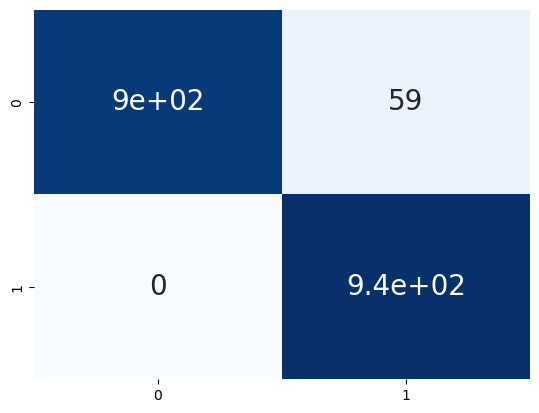

In [37]:
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 20})

In [38]:
ac_dt=accuracy_score(ytest, ypred)
ac_dt

0.9688489968321014

In [39]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       958
           1       0.94      1.00      0.97       936

    accuracy                           0.97      1894
   macro avg       0.97      0.97      0.97      1894
weighted avg       0.97      0.97      0.97      1894



In [40]:
from sklearn.linear_model import SGDClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    
    ('model', SGDClassifier())
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('model', SGDClassifier())])

In [41]:
SGD=SGDClassifier()

In [42]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_oresampled, y_oresampled, test_size=0.2, random_state=1)

pipeline.fit(Xtrain, ytrain)

ypred = pipeline.predict(Xtest)

cm = m.confusion_matrix(ytest, ypred)

report = m.classification_report(ytest, ypred)

<AxesSubplot:>

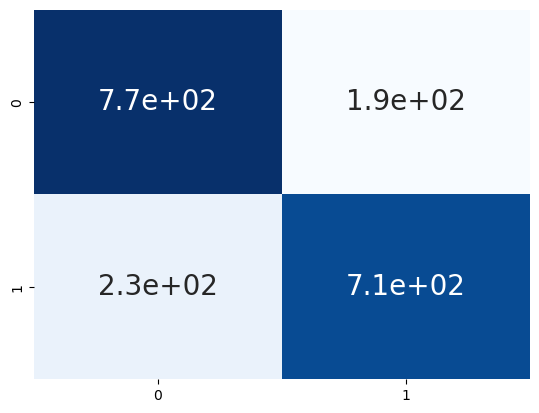

In [43]:
sns.heatmap(cm, annot=True, cmap='Blues', cbar=False, annot_kws={'size': 20})

In [44]:
ac_SGD=accuracy_score(ytest, ypred)
ac_SGD

0.779831045406547

In [45]:
print(report)

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       958
           1       0.79      0.76      0.77       936

    accuracy                           0.78      1894
   macro avg       0.78      0.78      0.78      1894
weighted avg       0.78      0.78      0.78      1894



In [46]:
ac_dt

0.9688489968321014

In [47]:
ac_lr

0.7925026399155227

In [48]:
ac_SGD

0.779831045406547

In [49]:
ac_svc

0.8262935586061246

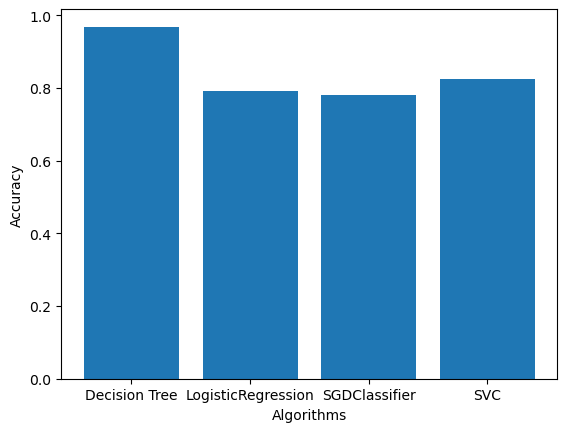

In [50]:
plt.bar(['Decision Tree','LogisticRegression','SGDClassifier','SVC'],[ac_dt,ac_lr,ac_SGD,ac_svc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [51]:
import pickle
with open('model_dt.pkl','wb') as file:
    pickle.dump(model,file)

In [52]:
joblib.load('model.jb')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level',
                                                   'bmi']),
                                                 ('categorical',
                                                  Pipeline(steps=[('hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('model', DecisionTreeClassifier())])

In [53]:
print(pipeline.feature_names_in_.tolist())

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']


In [54]:
model  = joblib.load('model.jb')
model.predict(X_test)

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [55]:
X_test.iloc[0].to_dict()

{'gender': 'Female',
 'age': 28.0,
 'hypertension': 0,
 'heart_disease': 0,
 'ever_married': 'Yes',
 'work_type': 'Govt_job',
 'Residence_type': 'Rural',
 'avg_glucose_level': 86.91,
 'bmi': 21.1,
 'smoking_status': 'formerly smoked'}

In [56]:
X_test['gender'].unique()

array(['Female', 'Male'], dtype=object)